In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
Y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

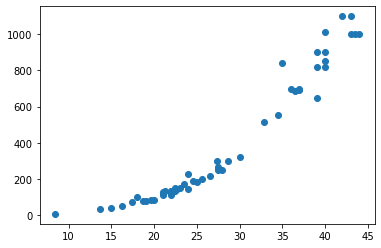

In [22]:
plt.scatter([X],[Y])

In [23]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y = train_test_split(X,Y,random_state=43)
print(t_x.shape,tt_x.shape)

(42,) (14,)


In [24]:
t_x

array([34.5, 39. , 43. , 16.2, 39. , 19.6, 22. , 36. , 19. , 40. , 30. ,
       22.5, 26.5, 32.8, 20. , 42. , 25.6, 21. , 27.5, 24. , 21. , 44. ,
       37. , 40. , 37. , 28. , 13.7, 24. , 21. , 28.7, 43.5, 23.5, 27.3,
       39. , 15. , 25. , 22. , 22. , 22.7, 40. ,  8.4, 17.4])

In [25]:
n_t_x = t_x.reshape(-1,1)#2차원으로 각원소가 하나씩 들어가게 변경작업해줌
n_tt_x = tt_x.reshape(-1,1)#테스트 데이터도 동일하게
print(n_t_x.shape,n_tt_x.shape)

(42, 1) (14, 1)


In [26]:
from sklearn.neighbors import KNeighborsRegressor # k회귀 점인접된것을 찾는것
#모델 생성
knr = KNeighborsRegressor()
knr.fit(n_t_x,t_y)#학습완료

KNeighborsRegressor()

In [27]:
knr.score(n_tt_x,tt_y)#테스트 데이터

0.9662464614810213

오차확인(차이점)/ 정답-결과

=> 머신러닝 Y =WX -학습 ->정답 = W입력 -> Y=W(학습돼서 값을 갖고있다.)x ->y=wx <-x입력

In [28]:
from sklearn.metrics import mean_absolute_error#비교모델
end_tt_y = knr.predict(n_tt_x)#회귀란 함수식을 새워두는것/ 모델(학습된)에다가 입력을 주겠다

mae=mean_absolute_error(tt_y,end_tt_y)#tt_y 실제 결과값
print(mae)#평균절댓값오차

29.69285714285715


In [29]:
knr.score(n_tt_x,tt_y)#95퍼센트의 수준으로 데이터 인식이 잘되고있다./ 오차와 동일하게 보면안된다. 스코어값이 높다고 신뢰성이랑 동일시하면안됨

0.9662464614810213

모델 변경전 트레이닝데이터로 점수확인

In [30]:
knr.fit(n_t_x,t_y)#데이터가 있다면 가까이 있는 숫자값에 맵팽서 숫자값 일치

KNeighborsRegressor()

In [31]:
knr.score(n_t_x,t_y)

0.9815010309553626

In [32]:
#...(38,4)(39,4.1)(40,4.2)(50,5)(60,6)#5가지중 각각의 평균값을 계산해줌
#x=40
knr.n_neighbors=3 #k의 선별숫자 변경
knr.fit(n_t_x,t_y)
knr.score(n_tt_x,tt_y)
#트레이닝점수가 높다고해서 무조건 좋은것이 아니다
#학습을 했을때 너무 벗어나거나 너무 포커싱되면 좋지않다
#테스트와 트레이닝데이터차이가 많이나면 1.학습이 덜된것/ 2.학습이 과도할때

0.9625437594582437

모델 변경후 트레이닝 데이터로 점수확인

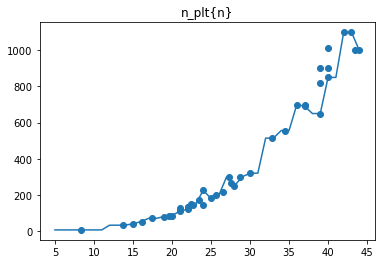

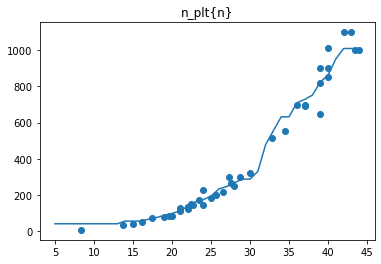

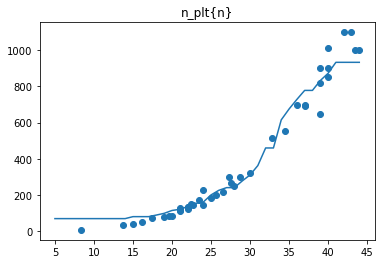

In [33]:
knr1=KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1)#비교를 위한 data생성
for n in [1,5,10]:
    knr1.n_neighbors=n
    knr1.fit(n_t_x,t_y)
    p_data=knr1.predict(x)
    plt.scatter(n_t_x,t_y)
    plt.plot(x,p_data)
    plt.title('n_plt{n}')
    plt.show()

k회귀의  한계

In [34]:
knr2=KNeighborsRegressor(n_neighbors=3)
knr2.fit(n_t_x,t_y)
knr2.predict([[50]])



array([1033.33333333])

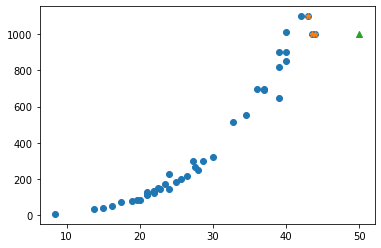

In [35]:
d,i=knr2.kneighbors([[50]])
plt.scatter(n_t_x,t_y)
plt.scatter(n_t_x[i],t_y[i],marker='*')
plt.scatter(50,1000.3,marker='^')

In [36]:
knr2.predict([[1000]])

array([1033.33333333])

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(n_t_x,t_y)


In [38]:
print(lr.predict([[50]]))
print(lr.predict([[1000]]))


[1187.92199858]
[35638.66987063]


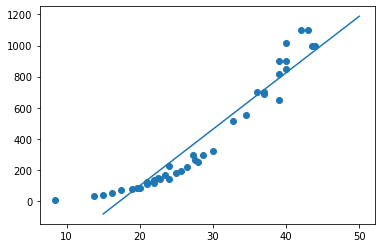

In [39]:
plt.scatter(n_t_x,t_y)
#1차 방정식을 만들어 내는것
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])#임의의 값에 웨이트값/ 웨이트값 결합 w0 lr.coef_ w1 lr.intercept_

## 다항으로 회귀

In [42]:
p_t_x=np.column_stack((n_t_x**2,n_t_x))
p_tt_x=np.column_stack((n_t_x**2,n_t_x))
print(p_t_x.shape,p_tt_x.shape)

(42, 2) (42, 2)


In [44]:
lr = LinearRegression()#만들어진 선형회귀 가져옴
lr.fit(p_t_x,t_y)#학습
print(lr.predict([[50**2,50]]))#[[]]써서 단일데이터로 만들어줌

[1573.06792794]


In [45]:
print(lr.coef_,lr.intercept_)

[  1.05682431 -24.53340579] 157.67745303390137


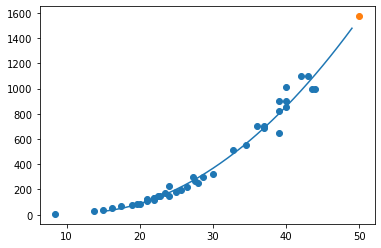

In [47]:
p=np.arange(15,50)
plt.scatter(n_t_x,t_y)
plt.plot(p,1.05*p**2 -24.5*p +157.6)#그래프에 y값 설정완료
plt.scatter([50],[1573.06])